In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Data from 25 Simulated Runs
Creating data frames for one run, ten runs, and twenty five runs.

In [5]:
run1 = pd.read_csv('simrun1.csv')
run2 = pd.read_csv('simrun2.csv')
run3 = pd.read_csv('simrun3.csv')
run4 = pd.read_csv('simrun1.csv')
run5 = pd.read_csv('simrun5.csv')
run6= pd.read_csv('simrun6.csv')
run7= pd.read_csv('simrun7.csv')
run8 = pd.read_csv('simrun8.csv')
run9 = pd.read_csv('simrun9.csv')
run10 = pd.read_csv('simrun10.csv')
run11 = pd.read_csv('simrun11.csv')
run12 = pd.read_csv('simrun12.csv')
run13 = pd.read_csv('simrun13.csv')
run14 = pd.read_csv('simrun14.csv')
run15 = pd.read_csv('simrun15.csv')
run16= pd.read_csv('simrun16.csv')
run17 = pd.read_csv('simrun17.csv')
run18 = pd.read_csv('simrun18.csv')
run19 = pd.read_csv('simrun19.csv')
run20 = pd.read_csv('simrun20.csv')
run21 = pd.read_csv('simrun21.csv')
run22 = pd.read_csv('simrun22.csv')
run23 = pd.read_csv('simrun23.csv')
run24 = pd.read_csv('simrun24.csv')
run25 = pd.read_csv('simrun25.csv')

trajectory = np.loadtxt('test_trajectory.txt')
trajectory_df = pd.DataFrame(data=trajectory, columns=['Time' , 'Position East' , 'Position North' , 'Position Up' , 'Velocity East' , 'Velocity North', 'Velocity Up', 'Acceleration East' , 'Acceleration North' , 'Acceleration Up'])
one_run_df = run1
ten_runs_df = pd.concat([run1, run2, run3, run4, run5, run6, run7, run8, run9, run10])
twenty_five_runs_df = pd.concat([run1, run2, run3, run4, run5, run6, run7, run8, run9, run10, run11, run12, run13, run14, run15, run16, run17, run18, run19, run20, run21, run22, run23, run24, run25])

#### Converting Target Position ENU to Target Position AER

In [13]:


Range = np.sqrt(trajectory_df['Position North']**2+trajectory_df['Position East']**2 + trajectory_df['Position Up']**2)

Azimuth = np.arctan2(trajectory_df['Position East'], trajectory_df['Position North']) * 180/np.pi

Elevation = np.arctan(trajectory_df['Position Up'] / np.sqrt(trajectory_df['Position East']**2+trajectory_df['Position North']**2)) * 180/np.pi

frame = { 'Range': Range, 'Elevation': Elevation, 'Azimuth': Azimuth}
RAE_df = pd.DataFrame(frame)
RAE_df


,Range,Elevation,Azimuth
0,50249.378106,5.710593,-2.485491e-16
1,50241.655433,5.712106,-4.678733e-03
2,50233.936231,5.713616,-9.350747e-03
3,50226.220496,5.715123,-1.401604e-02
4,50218.508223,5.716626,-1.867462e-02
...,...,...,...
9447,2489.053860,0.297692,-1.671545e+01
9448,2484.907959,0.240656,-1.672827e+01
9449,2480.763597,0.183598,-1.674109e+01
9450,2476.620764,0.126519,-1.675390e+01


#### Masking the data frames to only show detection data

In [14]:
mask = one_run_df.loggingType==1
one_run_detections = one_run_df[mask]

mask2= ten_runs_df.loggingType==1
ten_runs_detections =ten_runs_df[mask2]

mask3= twenty_five_runs_df.loggingType==1
twenty_five_detections =twenty_five_runs_df[mask3]




#### Plotting Target Position in ENU and AER

Text(0.5, 0.92, 'Target Position ENU')

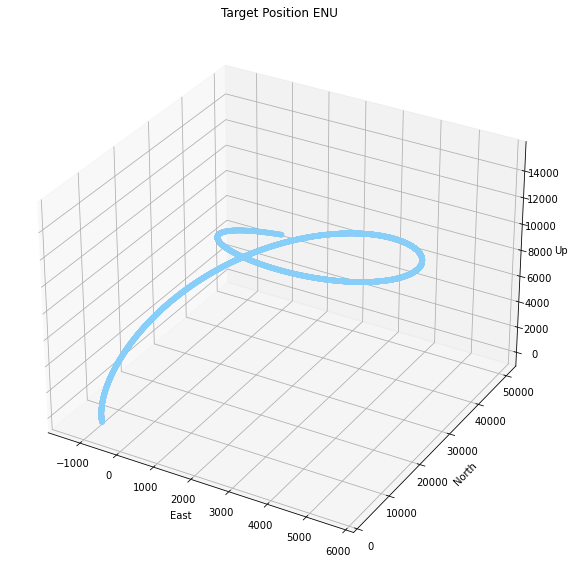

In [15]:
fig = plt.figure(figsize=[10, 10])
ax = plt.axes(projection='3d')
plot = ax.scatter(trajectory_df['Position East'], trajectory_df['Position North'], trajectory_df['Position Up'], color='lightskyblue')
ax.set_xlabel('East')
ax.set_ylabel('North')
ax.set_zlabel('Up')
ax.set_title(label='Target Position ENU')


Text(0.5, 0.92, 'Target Position EAR')

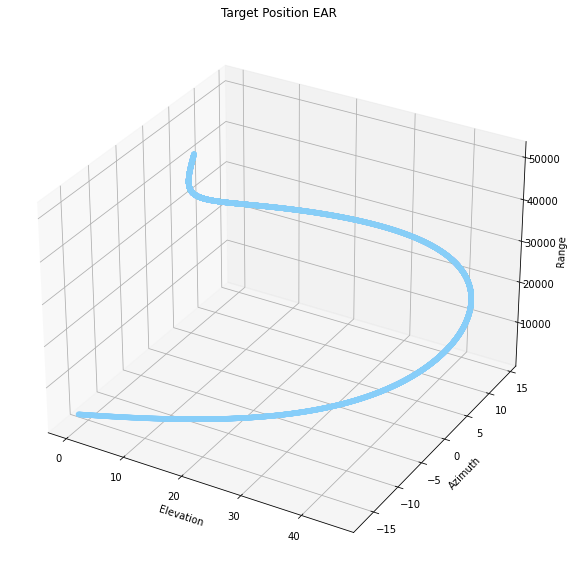

In [18]:
fig = plt.figure(figsize=[10, 10])
ax = plt.axes(projection='3d')
plot = ax.scatter(RAE_df['Elevation'], RAE_df['Azimuth'], RAE_df['Range'], color='lightskyblue')
ax.set_xlabel('Elevation')
ax.set_ylabel('Azimuth')
ax.set_zlabel('Range')
ax.set_title(label='Target Position EAR')


Text(0.5, 0.92, 'Detections vs. Target Position')

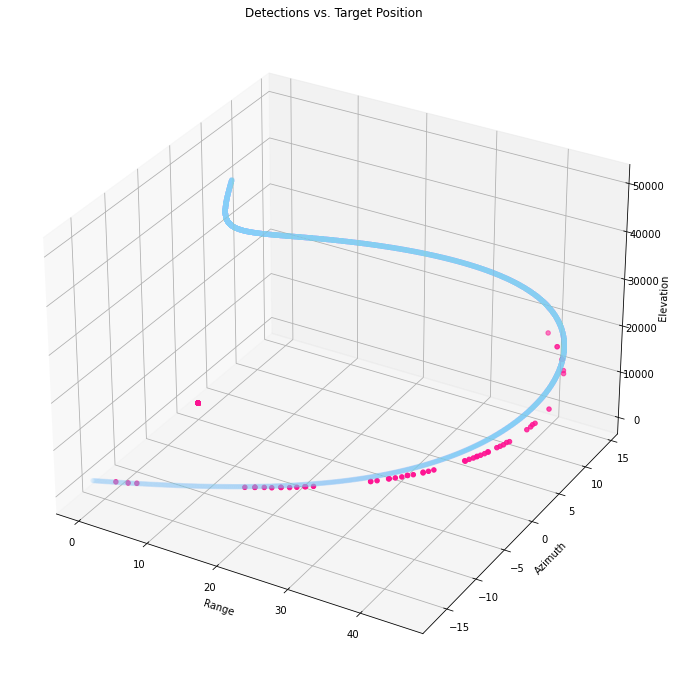

In [82]:
fig = plt.figure(figsize=[12, 12])
ax = plt.axes(projection='3d')
plot = ax.scatter(RAE_df['Elevation'], RAE_df['Azimuth'], RAE_df['Range'], color='lightskyblue', alpha=0.05)
plot1 = ax.scatter3D(one_run_df['elevationMeasurement'], one_run_df['azimuthMeasurement'], one_run_df['rangeMeasurement'], color='deeppink')
ax.set_xlabel('Range')
ax.set_ylabel('Azimuth')
ax.set_zlabel('Elevation')
ax.set_title(label='Detections vs. Target Position')


#### Plotting Target Position vs Detections for One Run, Ten Runs, and Twenty Five Runs

Text(0.5, 0.92, 'Detections vs. Target Position')

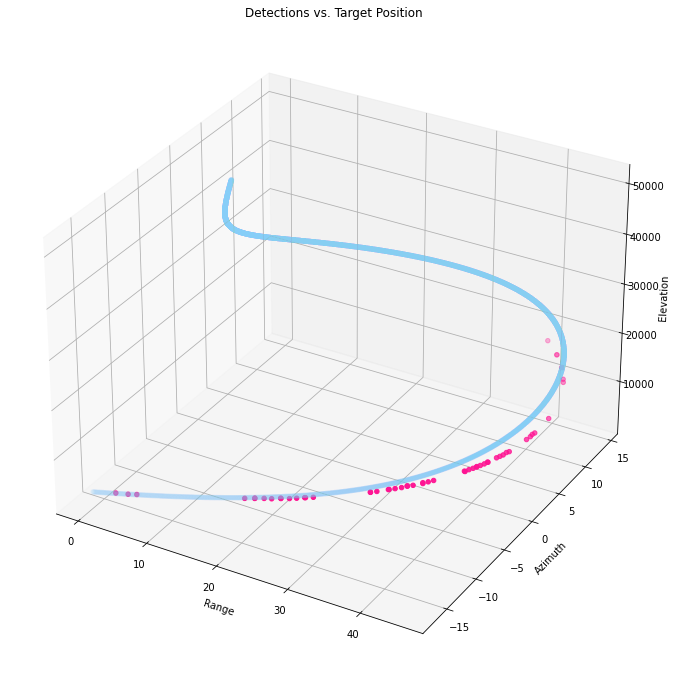

In [81]:
fig = plt.figure(figsize=[12, 12])
ax = plt.axes(projection='3d')
plot = ax.scatter(RAE_df['Elevation'], RAE_df['Azimuth'], RAE_df['Range'], color='lightskyblue', alpha=0.05)
plot1 = ax.scatter3D(one_run_detections['elevationMeasurement'], one_run_detections['azimuthMeasurement'], one_run_detections['rangeMeasurement'], color='deeppink')
ax.set_xlabel('Range')
ax.set_ylabel('Azimuth')
ax.set_zlabel('Elevation')
ax.set_title(label='Detections vs. Target Position')


Text(0.5, 0.92, 'Detections vs. Target Position')

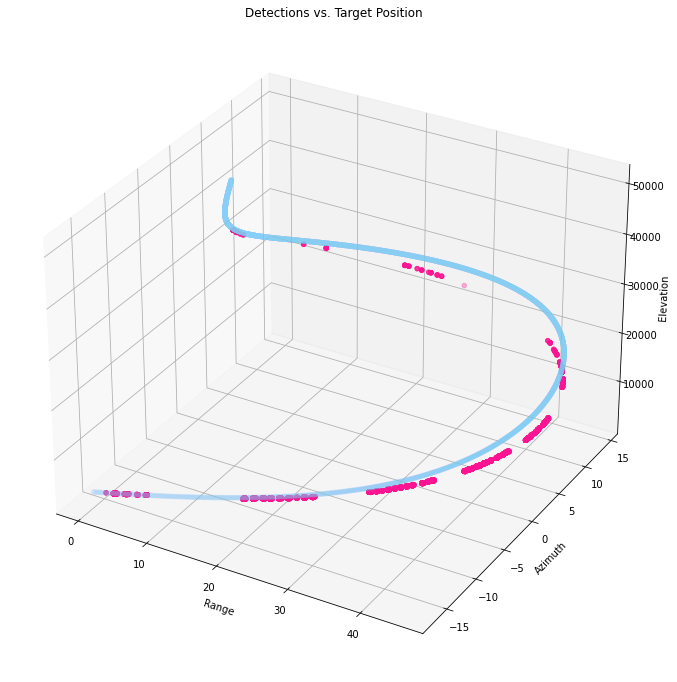

In [83]:
fig = plt.figure(figsize=[12, 12])
ax = plt.axes(projection='3d')
plot = ax.scatter(RAE_df['Elevation'], RAE_df['Azimuth'], RAE_df['Range'], color='lightskyblue', alpha=0.05)
plot1 = ax.scatter3D(twenty_five_detections['elevationMeasurement'], twenty_five_detections['azimuthMeasurement'], twenty_five_detections['rangeMeasurement'], color='deeppink')
ax.set_xlabel('Range')
ax.set_ylabel('Azimuth')
ax.set_zlabel('Elevation')
ax.set_title(label='Detections vs. Target Position')


#### Determining the Minimum Time to Get A Detection

In [35]:
min_time=twenty_five_detections['time'].min()
mean_time=twenty_five_detections['time'].mean()
print(min_time, mean_time)

27.600000000001515 161.60960598216292


In [36]:
min_time=one_run_detections['time'].min()
mean_time=one_run_detections['time'].mean()
print(min_time, mean_time)

121.19000000002508 164.4325454545406


In [37]:
min_time=ten_runs_detections['time'].min()
mean_time=ten_runs_detections['time'].mean()
print(min_time, mean_time)

27.600000000001515 162.8816933333281


#### Determining the Min and Max Range of Detections

In [96]:
min_range = twenty_five_detections['rangeMeasurement'].min()
max_range = twenty_five_detections['rangeMeasurement'].max()
avg_range = twenty_five_detections['rangeMeasurement'].mean()
print(min_range, max_range, avg_range)

2594.810812173392 41474.600500182816 7975.312668032509


#### Determining the Min and Max Range With No Missed Detections

In [48]:
mask4= twenty_five_runs_df.loggingType==(1 or 2)
twentyfive_nomiss =twenty_five_runs_df[mask4]

min_range_nomiss = twentyfive_nomiss['rangeMeasurement'].min()
max_range_nomiss = twentyfive_nomiss['rangeMeasurement'].max()
print(min_range_nomiss, max_range_nomiss)

2594.810812173392 41474.600500182816


#### Determining Number of Hits, Misses, and False Alarms

In [51]:
maskHits = twenty_five_runs_df.loggingType==1
maskFA = twenty_five_runs_df.loggingType==2
maskMiss = twenty_five_runs_df.loggingType==3

hits_df=twenty_five_runs_df[maskHits]
FA_df = twenty_five_runs_df[maskFA]
miss_df = twenty_five_runs_df[maskMiss]

In [54]:
index = hits_df.index
number_of_hits = len(index)
number_of_hits

3477

In [55]:
index = FA_df.index
number_of_FA = len(index)
number_of_FA

85

In [57]:
index = miss_df.index
number_of_miss= len(index)
number_of_miss

10926

In [67]:
total_hitmiss = number_of_hits + number_of_miss
hit_percent = number_of_hits/total_hitmiss * 100
miss_percent = number_of_miss / total_hitmiss *100
print(hit_percent, miss_percent)

24.14080399916684 75.85919600083317


In [71]:
total_detections = number_of_hits + number_of_FA
FA_percent = number_of_FA / total_detections * 100
hit_percent = number_of_hits / total_detections * 100
print(FA_percent, hit_percent)

2.386299831555306 97.6137001684447


In [92]:
mask = run1.loggingType==1
run1 = run1[mask]
min1 = run1['time'].min()

mask = run2.loggingType==1
run2 = run2[mask]
min2 = run2['time'].min()

mask = run3.loggingType==1
run3 = run3[mask]
min3 = run3['time'].min()

mask = run4.loggingType==1
run4 = run4[mask]
min4 = run4['time'].min()

mask = run5.loggingType==1
run5 = run5[mask]
min5 = run5['time'].min()

mask = run6.loggingType==1
run6 = run6[mask]
min6 = run6['time'].min()

mask = run7.loggingType==1
run7 = run7[mask]
min7 = run7['time'].min()

mask = run8.loggingType==1
run8 = run8[mask]
min8 = run8['time'].min()

mask = run9.loggingType==1
run9 = run9[mask]
min9 = run9['time'].min()

mask = run10.loggingType==1
run10 = run10[mask]
min10 = run10['time'].min()

mask = run11.loggingType==1
run11 = run11[mask]
min11 = run11['time'].min()

mask = run12.loggingType==1
run12 = run12[mask]
min12 = run12['time'].min()

mask = run13.loggingType==1
run13 = run13[mask]
min13 = run13['time'].min()

mask = run14.loggingType==1
run14 = run14[mask]
min14 = run14['time'].min()

mask = run15.loggingType==1
run15 = run15[mask]
min15 = run15['time'].min()

mask = run16.loggingType==1
run16 = run16[mask]
min16 = run16['time'].min()

mask = run17.loggingType==1
run17 = run17[mask]
min17 = run17['time'].min()

mask = run18.loggingType==1
run18 = run18[mask]
min18 = run18['time'].min()

mask = run19.loggingType==1
run19 = run19[mask]
min19 = run19['time'].min()

mask = run20.loggingType==1
run20 = run20[mask]
min20 = run20['time'].min()

mask = run21.loggingType==1
run21 = run21[mask]
min21 = run21['time'].min()

mask = run22.loggingType==1
run22 = run22[mask]
min22 = run22['time'].min()

mask = run23.loggingType==1
run23 = run23[mask]
min23 = run23['time'].min()

mask = run24.loggingType==1
run24 = run24[mask]
min24 = run24['time'].min()

mask = run25.loggingType==1
run25 = run25[mask]
min25 = run25['time'].min()


In [95]:
mins = [min1, min2, min3, min4, min5, min6, min7, min8, min9, min10, min11, min12, min13, min14, min15, min16, min17, min18, min19, min20, min21, min22, min23, min24, min25]
np.mean(mins)

60.96760000000809